<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

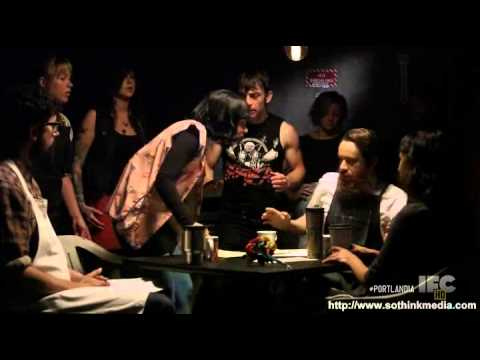

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\J8015\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/JenBanks8585/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops['full_review_text'][1]

' 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. '

In [3]:
shops.shape

(7616, 3)

In [4]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [5]:
#Creating a new column that grabs the star rating first digit value

shops['num_rate']=shops.star_rating.str.split('.').apply(lambda x:x[0])

In [6]:
#Creating a new column that grabs the date of review

shops['date_rev']=shops.full_review_text.str.split(' ').apply(lambda x:x[1])

In [7]:
#Creating a new column that grabs the actual review without the date

shops['text_rev']=shops.full_review_text.str.split(' ', 2).apply(lambda x:x[2])

In [8]:
#Dropping full text and star rating columns

shops=shops.drop(['full_review_text', 'star_rating'], axis=1)

In [9]:
#Converting num_rate to integers and removing leading space

shops['num_rate']=shops.num_rate.str.strip(' ').apply(lambda x:x)

In [10]:
shops.head(2)

,coffee_shop_name,num_rate,date_rev,text_rev
0,The Factory - Cafe With a Soul,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."


In [11]:
shops['num_rate'][0]

'5'

In [12]:
import re

def tokenize(text):
    """
    Parses a string into a list of semnatic units(words)
    
    Args: 
        text(str): The string that the function will tokenize
        
    Returns:
        list: tokens parsed out by themechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [13]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [14]:
# How can we count the raw text?
shops['text_rev'].value_counts(normalize=True)[:2]

3 check-ins This place has been shown on my social media for days so i finally visited! One of THE cutest and artistic looking coffeeshops I have ever visited. You can self order which is nice because you can take your time and look at the pictures to help you decide! I especially liked how pictures were shown so I knew which coffee/tea came out aesthetically  I ordered the famous matcha green latte and i dont usually drink coffee but it went beyond my expectations. They give you a good amount and its creamy and sweet. Only downside is no wifi.. So hard to study here. Matcha green tea and living la vida mocha Matcha green tea latte Interior design See all photos from Sarah L. for The Factory - Cafe With a Soul                                                                                                                                                                                                                                                                                         

In [15]:
shops['token_rev']= shops['text_rev'].apply(tokenize)

In [16]:
shops[['token_rev', 'text_rev']][:2]

,token_rev,text_rev
0,"[1, checkin, love, love, loved, the, atmospher...",1 check-in Love love loved the atmosphere! Eve...
1,"[listed, in, date, night, austin, ambiance, in...","Listed in Date Night: Austin, Ambiance in Aust..."


In [17]:
shops.head(2)

,coffee_shop_name,num_rate,date_rev,text_rev,token_rev
0,The Factory - Cafe With a Soul,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in..."


In [18]:
shops['num_rate'].value_counts(normalize = True)

5    0.496324
4    0.309874
3    0.096901
2    0.060399
1    0.036502
Name: num_rate, dtype: float64

In [20]:
#Converting numerical rate to word rate

shops['word_rate']=shops['num_rate'].apply({'5':'good','4':'good', '3':'bad', '2':'bad', '1':'bad'}.get)

In [21]:
shops.head(2)

,coffee_shop_name,num_rate,date_rev,text_rev,token_rev,word_rate
0,The Factory - Cafe With a Soul,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher...",good
1,The Factory - Cafe With a Soul,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in...",good


In [22]:
shops['word_rate'].value_counts(normalize = True)

good    0.806197
bad     0.193803
Name: word_rate, dtype: float64


How do we want to analyze these coffee shop tokens?
Overall Word / Token Count
View Counts by Rating
Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [23]:
#Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['token_rev'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [24]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [25]:
# Use the Function
wc = count(shops['token_rev'])
wc.head(2)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,the,6847,34809,1.0,0.044975,0.044975,0.899028
54,and,6864,26650,2.0,0.034433,0.079408,0.901261


In [26]:
wc.shape

(20530, 7)

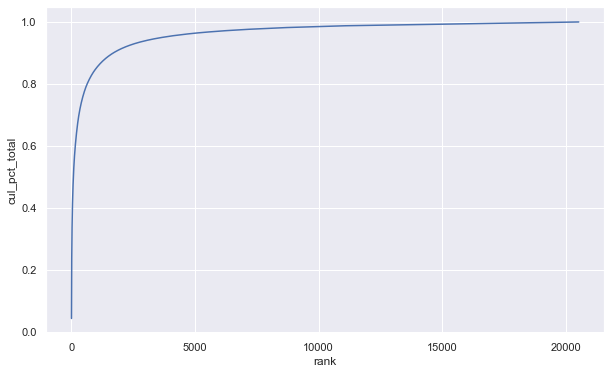

In [27]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [28]:
wc[wc['rank'] <= 200]['cul_pct_total'].max()

0.638908987544576

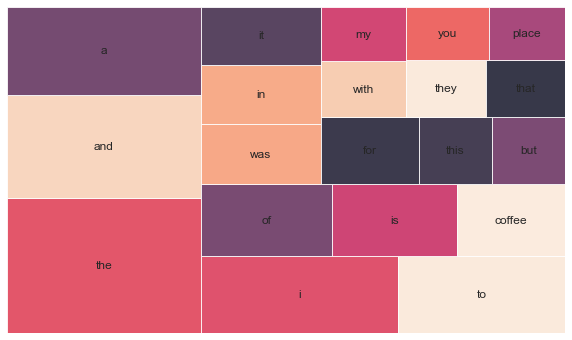

In [29]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [30]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [31]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['text_rev'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['token_rev'] = tokens

In [32]:
shops['token_rev'].head(10)

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
5    [1, check-in, Very, cute, cafe!, I, think, fro...
6    [2, check-ins, Listed, in, "Nuptial, Coffee, B...
7    [2, check-ins, Love, this, place!,  , 5, stars...
8    [1, check-in, Ok,, let's, try, this, approach....
9    [3, check-ins, This, place, has, been, shown, ...
Name: token_rev, dtype: object

In [33]:
wc = count(shops['token_rev'])
wc.head(3)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,the,6520,27779,1.0,0.034993,0.034993,0.856092
55,and,6804,25748,2.0,0.032434,0.067427,0.893382
33,a,6181,22085,3.0,0.027820,0.095247,0.811581


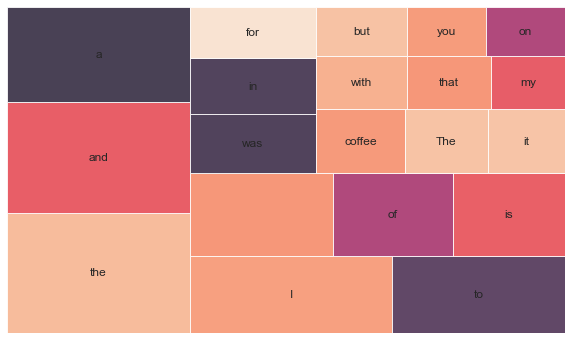

In [34]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Stop Words

In [35]:
shops.columns

Index(['coffee_shop_name', 'num_rate', 'date_rev', 'text_rev', 'token_rev',
       'word_rate'],
      dtype='object')

In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['text_rev'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['token_rev'] = tokens

In [37]:
shops['token_rev'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: token_rev, dtype: object

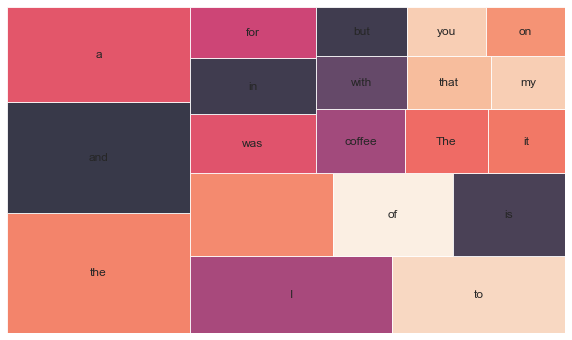

In [38]:
wc = count(shops['token_rev'])

wc_top30 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [39]:
wc_top30

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,,4343,14990,1.0,0.036868,0.036868,0.570247
27,coffee,4210,8058,2.0,0.019819,0.056687,0.552784
149,place,3029,4264,3.0,0.010487,0.067174,0.397715
118,great,2438,3250,4.0,0.007993,0.075167,0.320116
248,it's,2061,3117,5.0,0.007666,0.082833,0.270614
173,like,2034,2902,6.0,0.007137,0.089971,0.267069
164,good,2084,2779,7.0,0.006835,0.096806,0.273634
7,1,1998,2035,8.0,0.005005,0.101811,0.262342
0,check-in,1957,1961,9.0,0.004823,0.106634,0.256959
4,love,1434,1806,10.0,0.004442,0.111076,0.188288


In [40]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ',"it's", '1', 'i', "i'm", "i've", "it's", "don't", '-', 'coffee', 'got', 'it.', 'place'])

In [41]:
tokens = []

for doc in tokenizer.pipe(shops['text_rev'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['token_rev'] = tokens

In [42]:
wc = count(shops['token_rev'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
114,great,2438,3250,1.0,0.008801,0.008801,0.320116
168,like,2034,2902,2.0,0.007859,0.016659,0.267069
159,good,2084,2779,3.0,0.007525,0.024185,0.273634
0,check-in,1957,1961,4.0,0.005310,0.029495,0.256959
4,love,1434,1806,5.0,0.004891,0.034386,0.188288


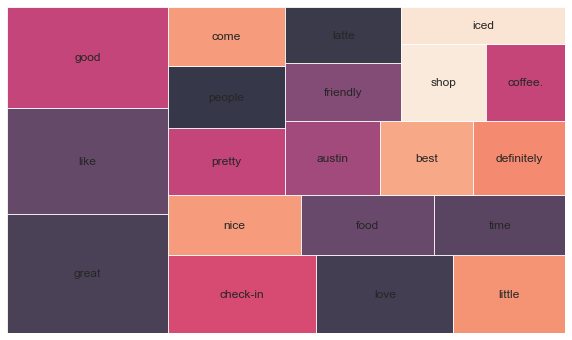

In [43]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?
Couple Notes:

-Rel. freq. instead of absolute counts b/c of different numbers of reviews
-Only look at the top 5-10 words with the greatest differences

In [44]:
# Make a comparison among all reviews, good and bad

shops['good']=shops['word_rate'].str.contains('good')
shops['bad']=shops['word_rate'].str.contains('bad')

In [45]:
shops['bad'].value_counts()

False    6140
True     1476
Name: bad, dtype: int64

In [46]:
print(shops.shape)
shops['word_rate'].value_counts()

(7616, 8)


good    6140
bad     1476
Name: word_rate, dtype: int64

In [47]:
wc = count(shops['token_rev'])
wc_good= count(shops[shops['good']==1]['token_rev'])
wc_bad= count(shops[shops['good']!=1]['token_rev'])

print(wc.shape, wc_good.shape, wc_bad.shape)

(38917, 7) (32897, 7) (15607, 7)


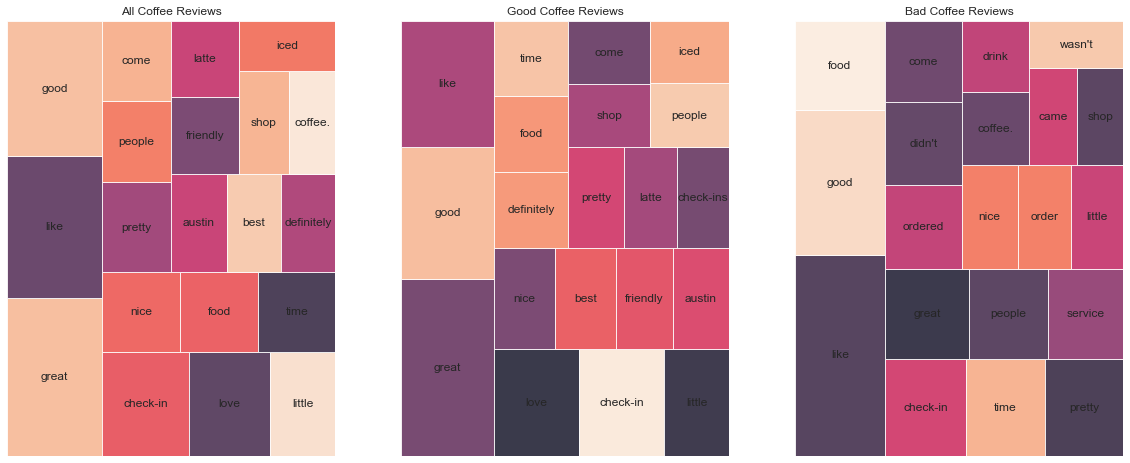

In [48]:
# Top 20 words for each occurrences

wc_top20=wc[wc['rank']<=20]
wc_good_top20=wc_good[wc_good['rank']<=20]
wc_bad_top20=wc_bad[wc_bad['rank']<=20]

fig, axes =plt.subplots (1, 3, figsize=(20,8))

axes[0].set_title('All Coffee Reviews')
squarify.plot(sizes =wc_top20['pct_total'], label=wc_top20['word'], alpha = .8, ax=axes[0])
axes[0].axis('off')


axes[1].set_title('Good Coffee Reviews')
squarify.plot(sizes =wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha = .8, ax=axes[1])
axes[1].axis('off')


axes[2].set_title('Bad Coffee Reviews')
squarify.plot(sizes =wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha = .8, ax=axes[2])
axes[2].axis('off')

plt.show();

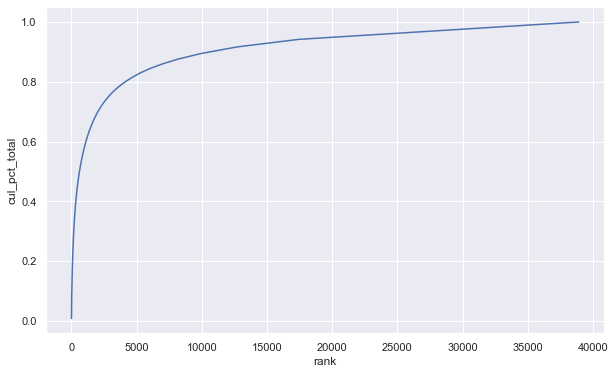

In [49]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [50]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.22437655877231708

In [51]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38896,delicious...and,1,1,38898.0,0.000003,0.999949,0.000131
38903,"(turkey,",1,1,38899.0,0.000003,0.999951,0.000131
38898,romaine,1,1,38900.0,0.000003,0.999954,0.000131
38902,"rib,",1,1,38901.0,0.000003,0.999957,0.000131
38899,"predictably,",1,1,38902.0,0.000003,0.999959,0.000131
38897,blts,1,1,38903.0,0.000003,0.999962,0.000131
38900,(+,1,1,38904.0,0.000003,0.999965,0.000131
38901,turkey),1,1,38905.0,0.000003,0.999968,0.000131
38904,(pork),1,1,38906.0,0.000003,0.999970,0.000131
38905,roomier,1,1,38907.0,0.000003,0.999973,0.000131


In [52]:
wc['appears_in_pct'].describe()

count    38917.000000
mean         0.001142
std          0.006126
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.320116
Name: appears_in_pct, dtype: float64

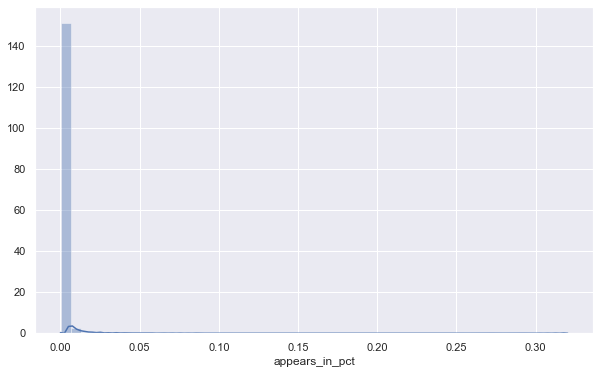

In [53]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

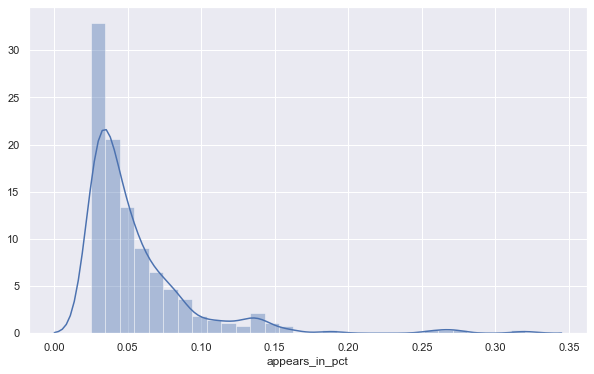

In [54]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [55]:
wc.shape

(281, 7)

In [56]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

wolf
wolv


In [57]:
#Use tqdm progess_apply

from pandas import Panel
from tqdm import tqdm
tqdm.pandas()

C:\Users\J8015\anaconda3\envs\u4s1-nlp\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\J8015\anaconda3\envs\u4s1-nlp\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [58]:
shops['stems']= shops.token_rev.progress_apply(lambda x:[ps.stem(word) for word in x])
shops.head(2)

100%|█████████████████████████████████████████████████████████████████████████████| 7616/7616 [00:10<00:00, 737.06it/s]


,coffee_shop_name,num_rate,date_rev,text_rev,token_rev,word_rate,good,bad,stems
0,The Factory - Cafe With a Soul,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[check-in, love, love, loved, atmosphere!, cor...",good,True,False,"[check-in, love, love, love, atmosphere!, corn..."
1,The Factory - Cafe With a Soul,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, date, night:, austin,, ambiance, aust...",good,True,False,"[list, date, night:, austin,, ambianc, austin,..."


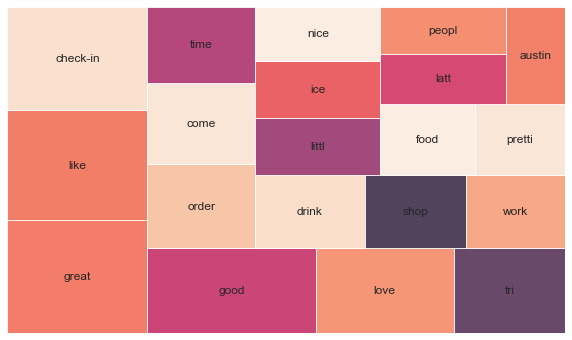

In [59]:
wc = count(shops['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [60]:
wc.shape

(34395, 7)

In [61]:
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [62]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [142]:
shops['lemmas'] = shops['text_rev'].progress_apply(get_lemmas)

100%|██████████████████████████████████████████████████████████████████████████████| 7616/7616 [03:37<00:00, 35.04it/s]


In [143]:
shops['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

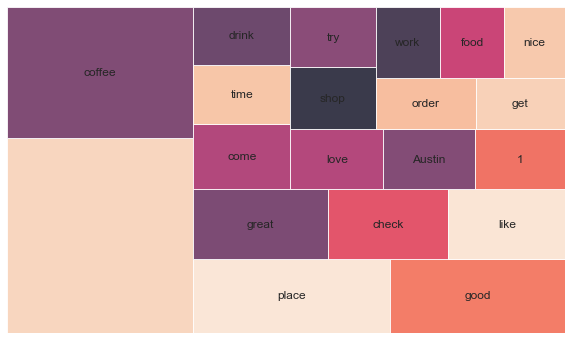

In [144]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Using TextBlob
- Sentiment analysis (or opnion mining) attempts to determine if a text is subjective or objective, positive or negative
- The sentiment analysis lexicon bundlef in Pattern focuses on adjectives
- It contains adjectives that occur frequenctly in customer reviews, hand tagged with values for polarity and subjectivity

In [63]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualize_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T, center=0, annot=True, cmap='PiYG')

In [64]:
from textblob import TextBlob

TextBlob(' Textblob makes it simple and easy to calculate sentiment').sentiment

Sentiment(polarity=0.21666666666666667, subjectivity=0.5952380952380952)

In [65]:
sentence = shops['text_rev'].iloc[0]
print(sentence)
TextBlob(sentence).sentiment

1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 


Sentiment(polarity=0.5034722222222222, subjectivity=0.75)

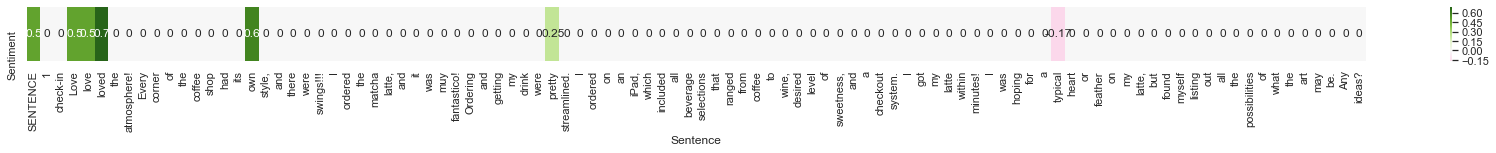

In [66]:
visualize_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()]
})

In [67]:
#Spelling Correction

TextBlob("Texblob also makes it simple and easy to correcct speeling").correct()

TextBlob("Texblob also makes it simple and easy to correct spelling")

## ScatterText

In [68]:
#Create a copy of the dataframe and add columns that have tags for 'good' and 'bad'

subset_shops = shops.copy()

subset_shops.loc[subset_shops['word_rate'].str.contains('good'), 'rate'] ='GOOD'
subset_shops.loc[subset_shops['word_rate'].str.contains('bad'), 'rate'] ='BAD'

print(subset_shops.shape)
subset_shops['rate'].value_counts()

(7616, 10)


GOOD    6140
BAD     1476
Name: rate, dtype: int64

In [70]:
import scattertext as st

corpus = st.CorpusFromPandas(subset_shops,
                             category_col ='rate',
                             text_col = 'text_rev',
                             nlp = nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category = "GOOD",
    category_name = "GOOD",
    not_category_name = "BAD",
    width_in_pixels = 1000,
    metadata = subset_shops['text_rev'])
open('./good_vs_bad.html', 'w').write(html)

                            
                            

10754736


## Stretch Goals
- Analyze another corpus of documents - such as Indeed.com job listings ;).
- Play with the Spacy API to
- Extract Named Entities
- Extracting 'noun chunks'
- Attempt Document Classification with just Spacy
- Note: This course will be of interesting in helping you with these stretch goals.
- Try to build a plotly dash app with your text data

In [2]:
import numpy as np
import pandas as pd